<a href="https://colab.research.google.com/github/GentleAgent/FDS_Presentation/blob/main/FDS_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

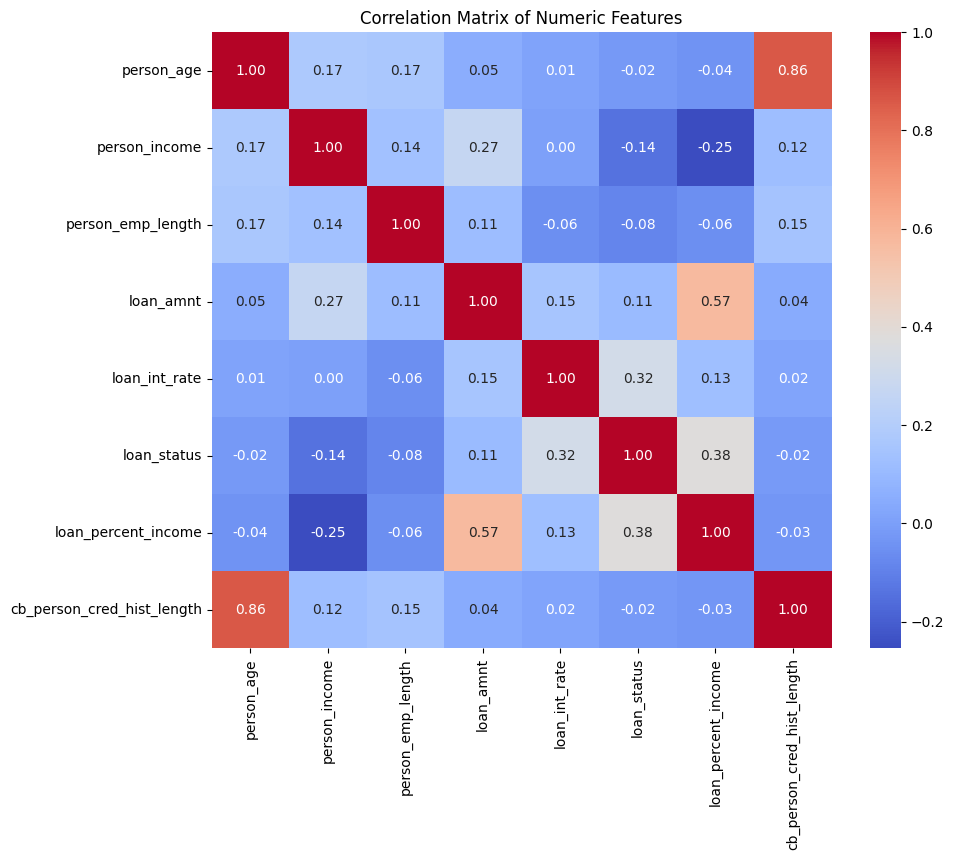

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('credit_risk_dataset.csv')

emp_features = ['person_age', 'person_income', 'loan_amnt', 'loan_percent_income', 'cb_person_cred_hist_length']
rate_features = emp_features + ['person_emp_length']

emp_df = df[emp_features + ['person_emp_length']].dropna(subset=emp_features)

X_emp = emp_df[emp_features]
y_emp = emp_df['person_emp_length']
X_train_emp, X_test_emp, y_train_emp, y_test_emp = train_test_split(X_emp, y_emp, test_size=0.2, random_state=42)

X_train_emp = X_train_emp[y_train_emp.notna()]
y_train_emp = y_train_emp[y_train_emp.notna()]

emp_model = LinearRegression()
emp_model.fit(X_train_emp, y_train_emp)

missing_emp = df.loc[df['person_emp_length'].isna(), emp_features]
df.loc[df['person_emp_length'].isna(), 'person_emp_length'] = emp_model.predict(missing_emp)

rate_df = df[rate_features + ['loan_int_rate']].dropna(subset=rate_features)

X_rate = rate_df[rate_features]
y_rate = rate_df['loan_int_rate']
X_train_rate, X_test_rate, y_train_rate, y_test_rate = train_test_split(X_rate, y_rate, test_size=0.2, random_state=42)

X_train_rate = X_train_rate[y_train_rate.notna()]
y_train_rate = y_train_rate[y_train_rate.notna()]

rate_model = LinearRegression()
rate_model.fit(X_train_rate, y_train_rate)

missing_rate = df.loc[df['loan_int_rate'].isna(), rate_features]
df.loc[df['loan_int_rate'].isna(), 'loan_int_rate'] = rate_model.predict(missing_rate)

numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


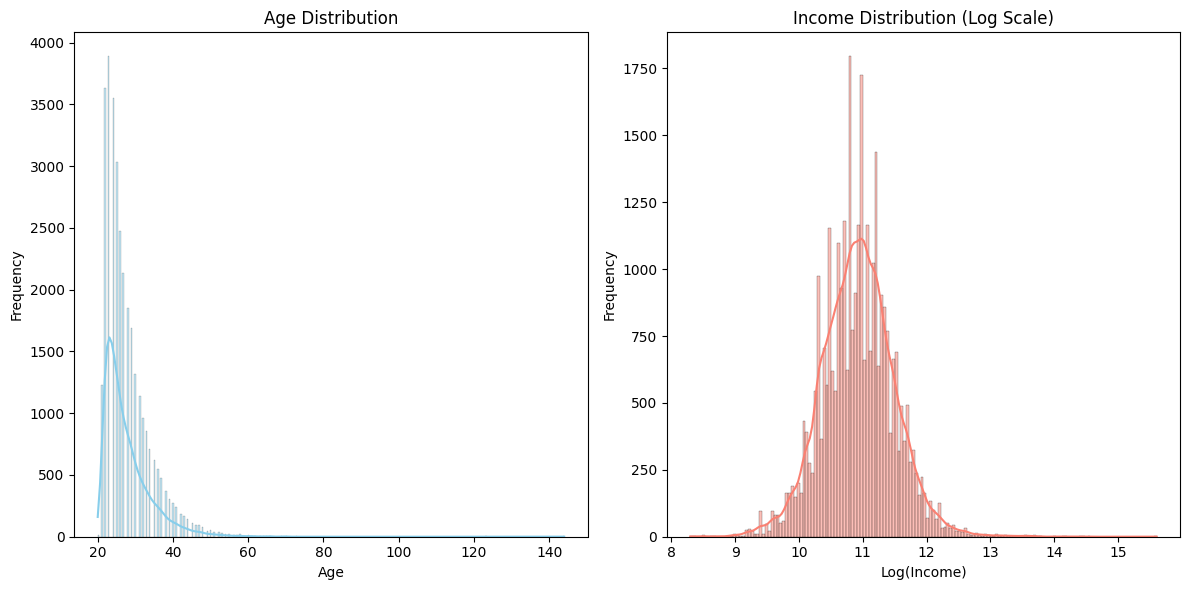

In [ ]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(df['person_age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['person_income']), kde=True, color='salmon')
plt.title('Income Distribution (Log Scale)')
plt.xlabel('Log(Income)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


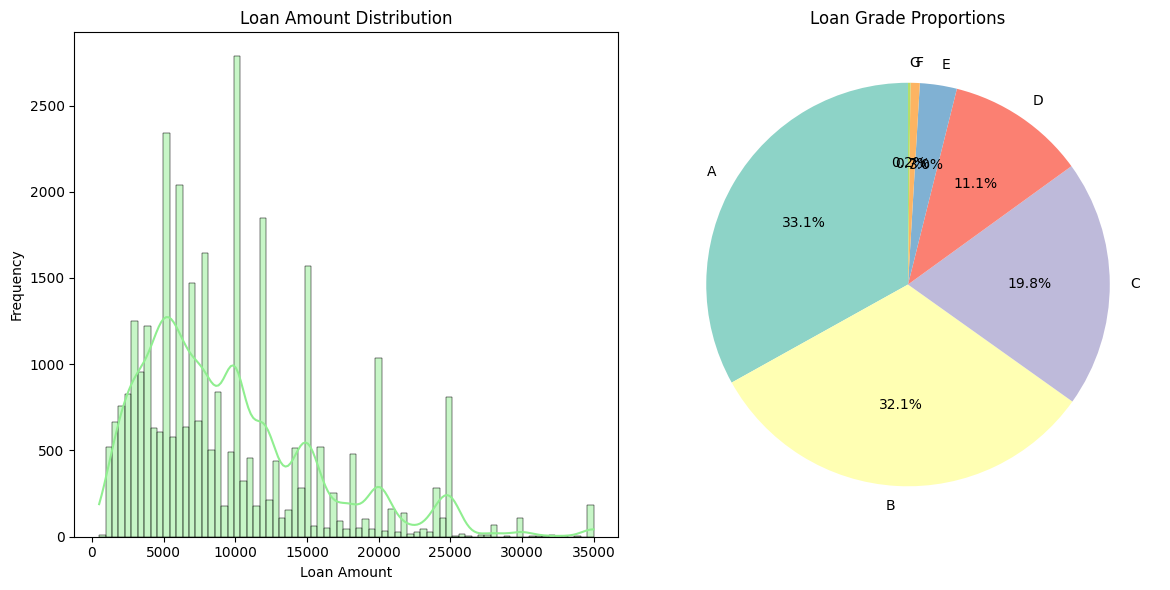

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['loan_amnt'], kde=True, color='lightgreen')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['loan_grade'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Loan Grade Proportions')
plt.ylabel('')

plt.tight_layout()
plt.show()


<ipython-input-6-7efc51fa623e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_intent', palette='viridis')


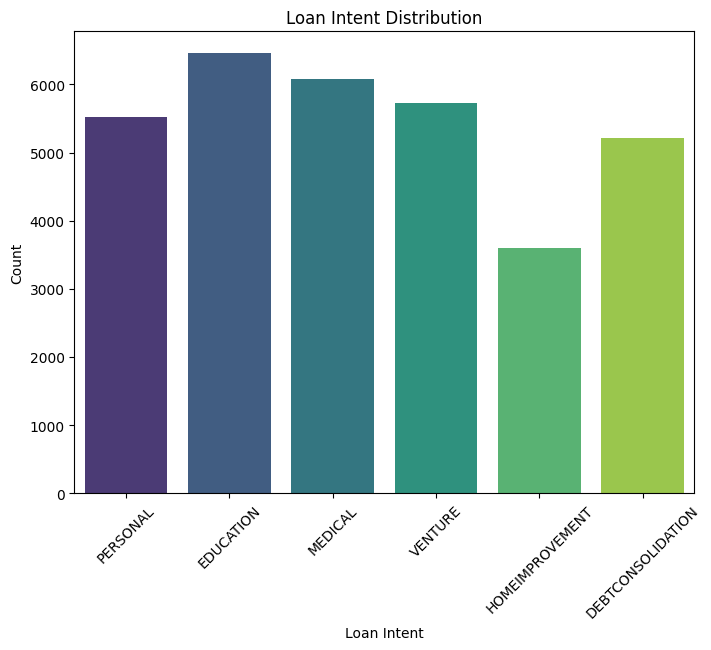

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='loan_intent', palette='viridis')
plt.title('Loan Intent Distribution')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()


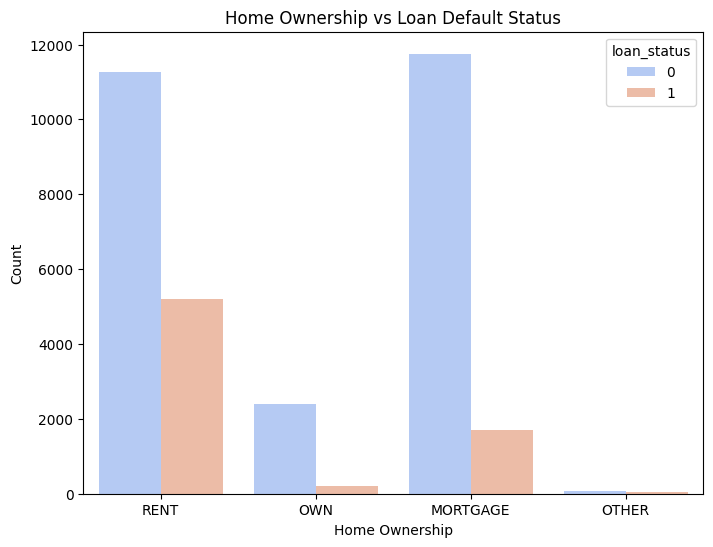

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='person_home_ownership', hue='loan_status', palette='coolwarm')
plt.title('Home Ownership vs Loan Default Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')

plt.show()


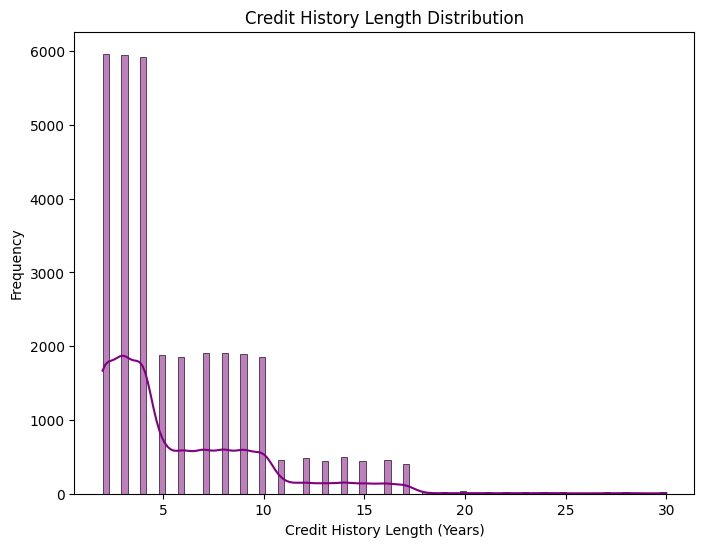

In [ ]:
plt.figure(figsize=(8, 6))

sns.histplot(df['cb_person_cred_hist_length'], kde=True, color='purple')
plt.title('Credit History Length Distribution')
plt.xlabel('Credit History Length (Years)')
plt.ylabel('Frequency')

plt.show()


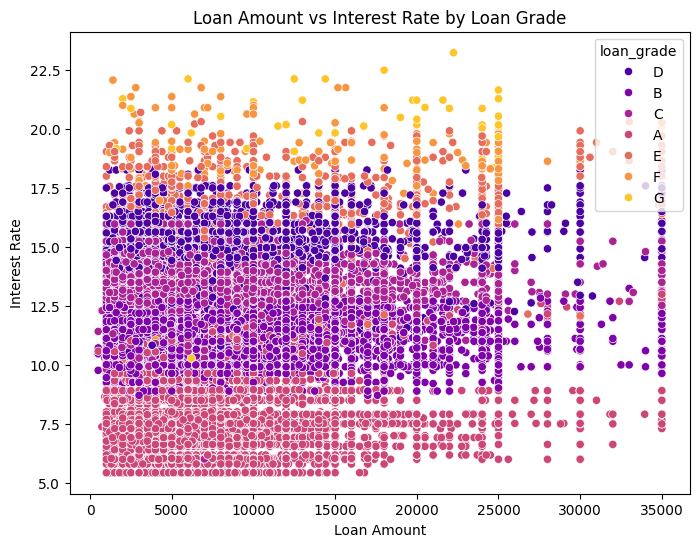

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x='loan_amnt', y='loan_int_rate', hue='loan_grade', palette='plasma')
plt.title('Loan Amount vs Interest Rate by Loan Grade')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')

plt.show()


In [3]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import numpy as np
import dash_bootstrap_components as dbc

# Load dataset
df = pd.read_csv('credit_risk_dataset.csv')

# Data Preprocessing
df['person_income_log'] = np.log1p(df['person_income'])  # Log for income

# Initialize Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Create a function to filter the data based on selected loan intent
def filter_data(selected_intent):
    return df[df['loan_intent'] == selected_intent]

# Define figures (default)
def create_figures(filtered_df):
    # 1. Age Distribution
    fig_age = px.histogram(filtered_df, x='person_age', nbins=20, title='Age Distribution', marginal="box")

    # 2. Income Distribution (Log Scale)
    fig_income = px.histogram(filtered_df, x='person_income_log', nbins=20, title='Income Distribution (Log Scale)', marginal="box")

    # 3. Loan Amount Distribution
    fig_loan_amount = px.histogram(filtered_df, x='loan_amnt', nbins=20, title='Loan Amount Distribution')

    # 4. Loan Grade Proportions
    loan_grade_counts = filtered_df['loan_grade'].value_counts()
    fig_loan_grade = px.pie(names=loan_grade_counts.index, values=loan_grade_counts.values, title='Loan Grade Proportions')

    # 5. Loan Intent Distribution
    fig_loan_intent = px.bar(filtered_df['loan_intent'].value_counts(), title='Loan Intent Distribution')

    # 6. Home Ownership vs Default Status
    fig_home_ownership = px.histogram(filtered_df, x='person_home_ownership', color='loan_status', barmode='group', title='Home Ownership vs Loan Default Status')

    # 7. Credit History Length Distribution
    fig_credit_history = px.histogram(filtered_df, x='cb_person_cred_hist_length', title='Credit History Length Distribution')

    # 8. Loan Amount vs Interest Rate by Loan Grade
    fig_loan_vs_rate = px.scatter(filtered_df, x='loan_amnt', y='loan_int_rate', color='loan_grade', title='Loan Amount vs Interest Rate')

    return fig_age, fig_income, fig_loan_amount, fig_loan_grade, fig_loan_intent, fig_home_ownership, fig_credit_history, fig_loan_vs_rate

# App layout
app.layout = html.Div([
    html.H1('Credit Risk Data Dashboard'),

    dcc.Dropdown(
        id='loan-intent-dropdown',
        options=[{'label': intent, 'value': intent} for intent in df['loan_intent'].unique()],
        value=df['loan_intent'].unique()[0],  # Set default value
        clearable=False
    ),

    # Row 1: Demographics
    html.Div([
        html.Div([dcc.Graph(id='fig-age')], className='six columns'),
        html.Div([dcc.Graph(id='fig-income')], className='six columns'),
    ], className='row'),

    # Row 2: Loan Insights
    html.Div([
        html.Div([dcc.Graph(id='fig-loan-amount')], className='six columns'),
        html.Div([dcc.Graph(id='fig-loan-grade')], className='six columns'),
    ], className='row'),

    # Row 3: Loan Intent and Home Ownership
    html.Div([
        html.Div([dcc.Graph(id='fig-loan-intent')], className='six columns'),
        html.Div([dcc.Graph(id='fig-home-ownership')], className='six columns'),
    ], className='row'),

    # Row 4: Credit History
    html.Div([
        html.Div([dcc.Graph(id='fig-credit-history')], className='six columns'),
        # Add any other graphs as needed
    ], className='row'),

    # Row 5: Loan Amount vs Interest Rate
    html.Div([
        dcc.Graph(id='fig-loan-vs-rate')
    ]),
])

# Callbacks
@app.callback(
    [Output('fig-age', 'figure'),
     Output('fig-income', 'figure'),
     Output('fig-loan-amount', 'figure'),
     Output('fig-loan-grade', 'figure'),
     Output('fig-loan-intent', 'figure'),
     Output('fig-home-ownership', 'figure'),
     Output('fig-credit-history', 'figure'),
     Output('fig-loan-vs-rate', 'figure')],
    Input('loan-intent-dropdown', 'value')
)
def update_figures(selected_intent):
    filtered_df = filter_data(selected_intent)
    return create_figures(filtered_df)

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>